# Breast Cancer Dataset: Exploratory Data Analysis

## Import Dependencies

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook"
import warnings
warnings.filterwarnings('ignore')
import os

## Data Loading

In [31]:
df = pd.read_csv("../data/data.csv")

print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

## Basic Dataset Information

In [32]:
print(f"Dataset dimensions (rows, columns): {df.shape}")

print("\nColumns in the dataset:")
df.columns

Dataset dimensions (rows, columns): (569, 33)

Columns in the dataset:


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [33]:
print("\nDataset information:")
df.info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  peri

## Statistical Summary

In [34]:
df.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

## Check for Missing Values and Duplicates

In [35]:
print("Missing values per column:")
missing_values = df.isna().sum()
print(missing_values[missing_values > 0] if any(missing_values > 0) else "No missing values found")

Missing values per column:
Unnamed: 32    569
dtype: int64


In [36]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 0


## Class Distribution Analysis

In [37]:
if 'diagnosis' in df.columns:
    diagnosis_counts = df['diagnosis'].value_counts()
    print("Diagnosis value counts:")
    print(diagnosis_counts)
    print(f"\nPercentage of malignant cases: {100 * diagnosis_counts['M'] / len(df):.2f}%")
    print(f"Percentage of benign cases: {100 * diagnosis_counts['B'] / len(df):.2f}%")
    
    fig = px.histogram(
        df,
        x='diagnosis',
        color='diagnosis',
        title="Class Distribution (Diagnosis)",
        text_auto=True,
        color_discrete_sequence=px.colors.qualitative.Set2
    )
    
    fig.update_layout(
        xaxis_title="Diagnosis Class",
        yaxis_title="Count",
        title_x=0.5,
        plot_bgcolor="white",
        font=dict(size=14)
    )
    
    fig.show()

Diagnosis value counts:
diagnosis
B    357
M    212
Name: count, dtype: int64

Percentage of malignant cases: 37.26%
Percentage of benign cases: 62.74%


## Correlation Analysis

In [38]:
corr = df.select_dtypes(include=['number']).corr().round(2)

fig = go.Figure(data=go.Heatmap(
    z=corr.values,
    x=corr.columns,
    y=corr.index,
    colorscale='Blues',
    zmin=0,
    zmax=1,
    text=corr.values,
    texttemplate="%{text:.2f}",
    colorbar=dict(title='Correlation'),
    hovertemplate='X: %{x}<br>Y: %{y}<br>Correlation: %{z:.2f}<extra></extra>'
))

fig.update_layout(
    title='Correlation Heatmap (Numerical Features Only)',
    xaxis_title='Features',
    yaxis_title='Features',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(size=12, color='black'),
    width=900,
    height=700
)

fig.show()

## Feature Distribution by Diagnosis Class

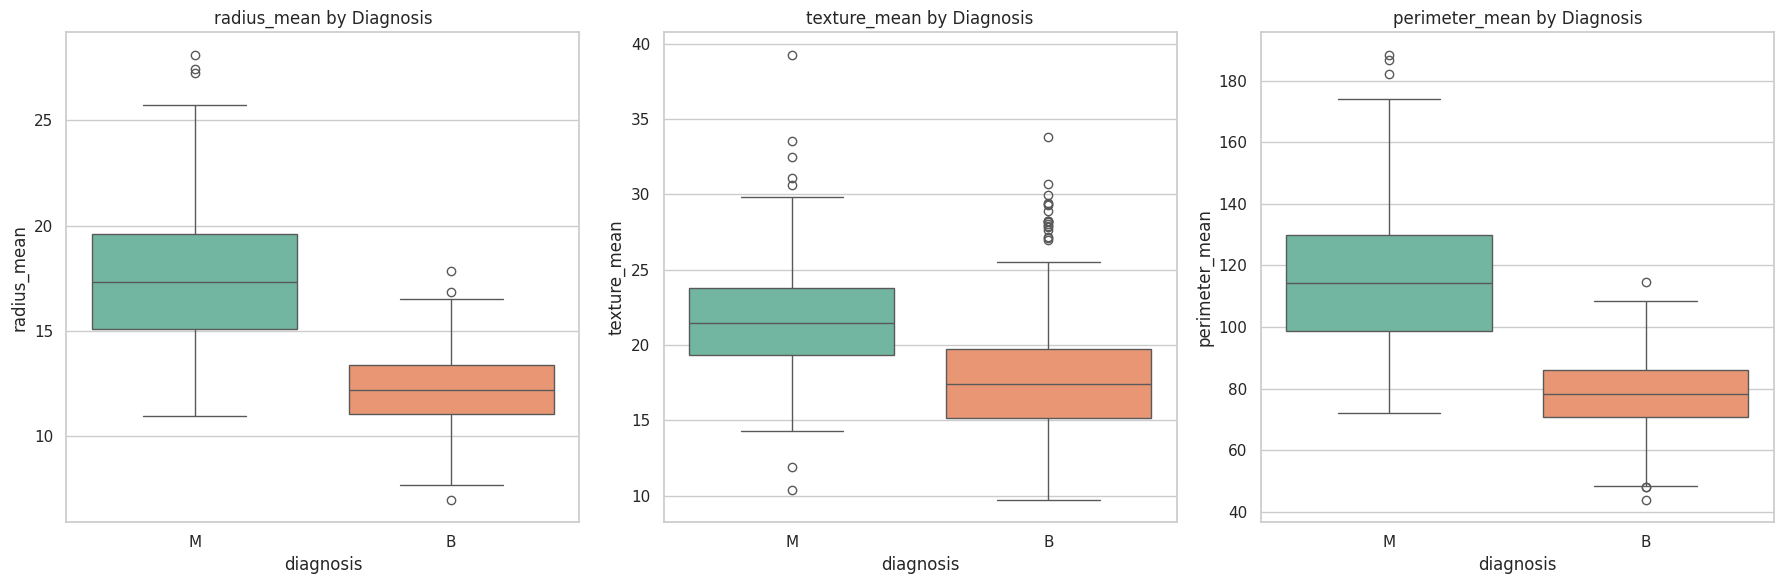

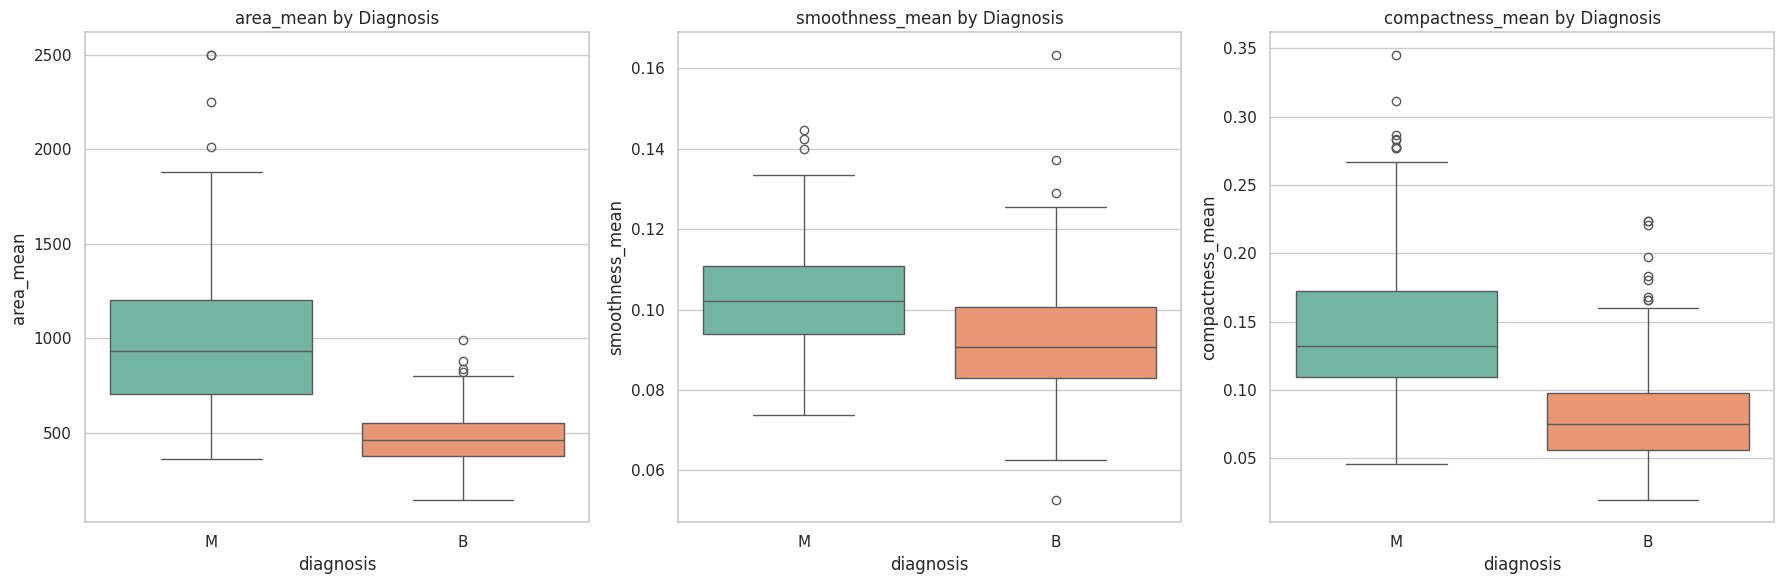

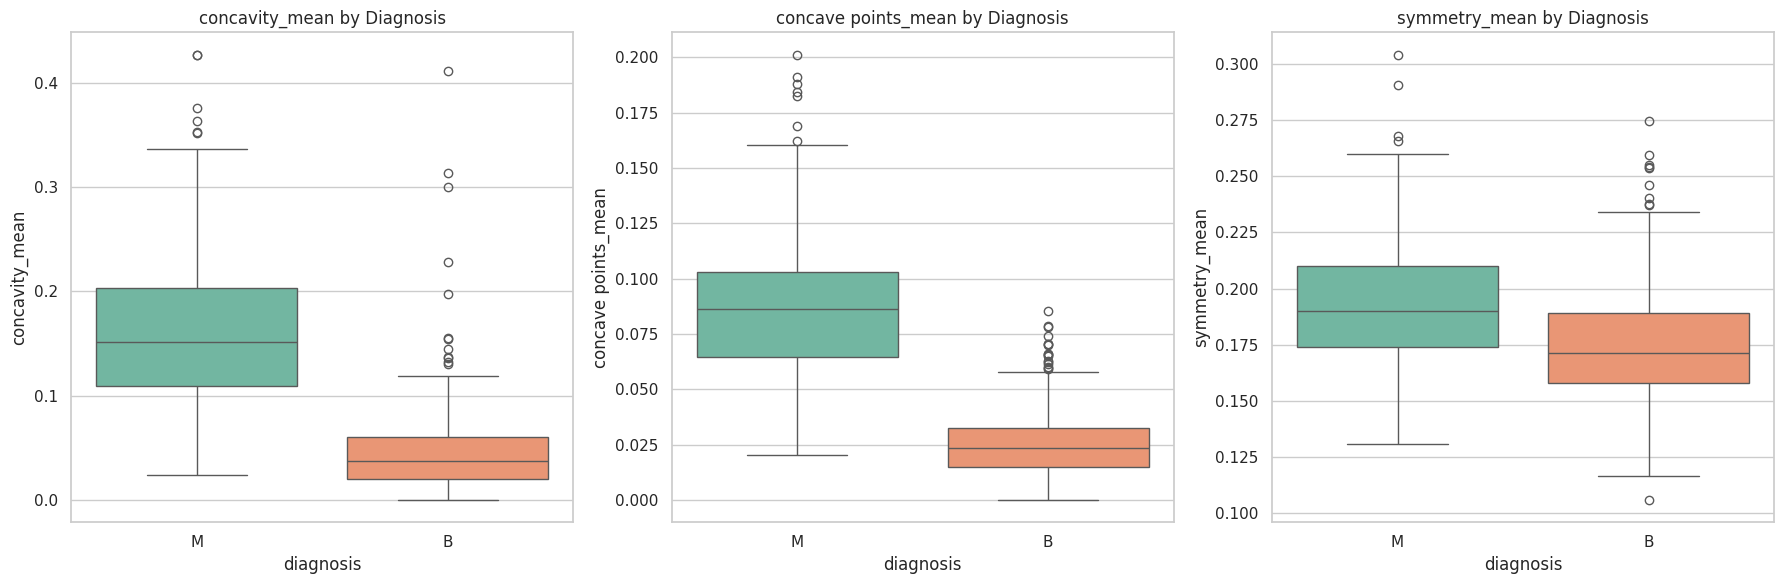

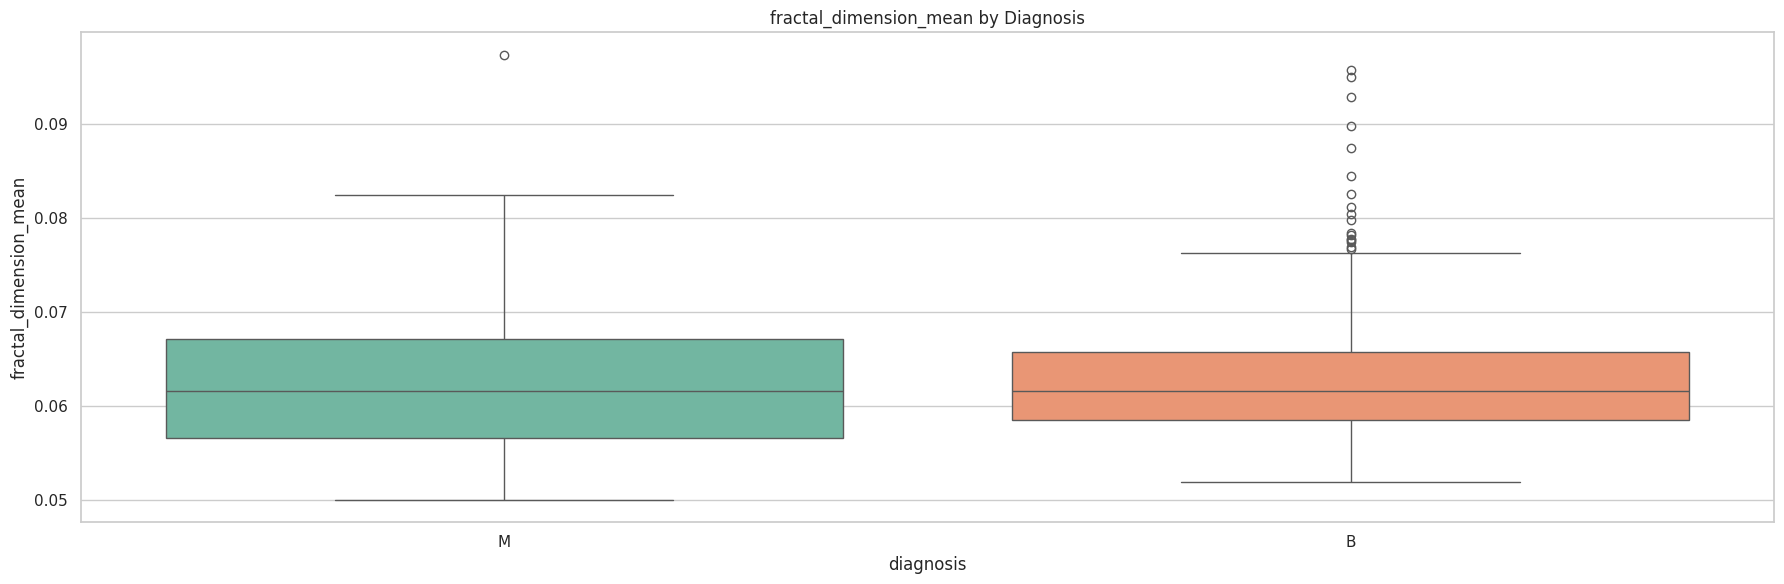

In [39]:
mean_features = [col for col in df.columns if 'mean' in col]

for i in range(0, len(mean_features), 3):
    features_batch = mean_features[i:i+3] if i+3 <= len(mean_features) else mean_features[i:]
    fig = plt.figure(figsize=(18, 6))
    
    for j, feature in enumerate(features_batch):
        plt.subplot(1, len(features_batch), j+1)
        sns.boxplot(x='diagnosis', y=feature, data=df, palette='Set2')
        plt.title(f"{feature} by Diagnosis")
        plt.xticks(rotation=0)
    
    plt.tight_layout()
    plt.show()

## Pairplot for Key Features

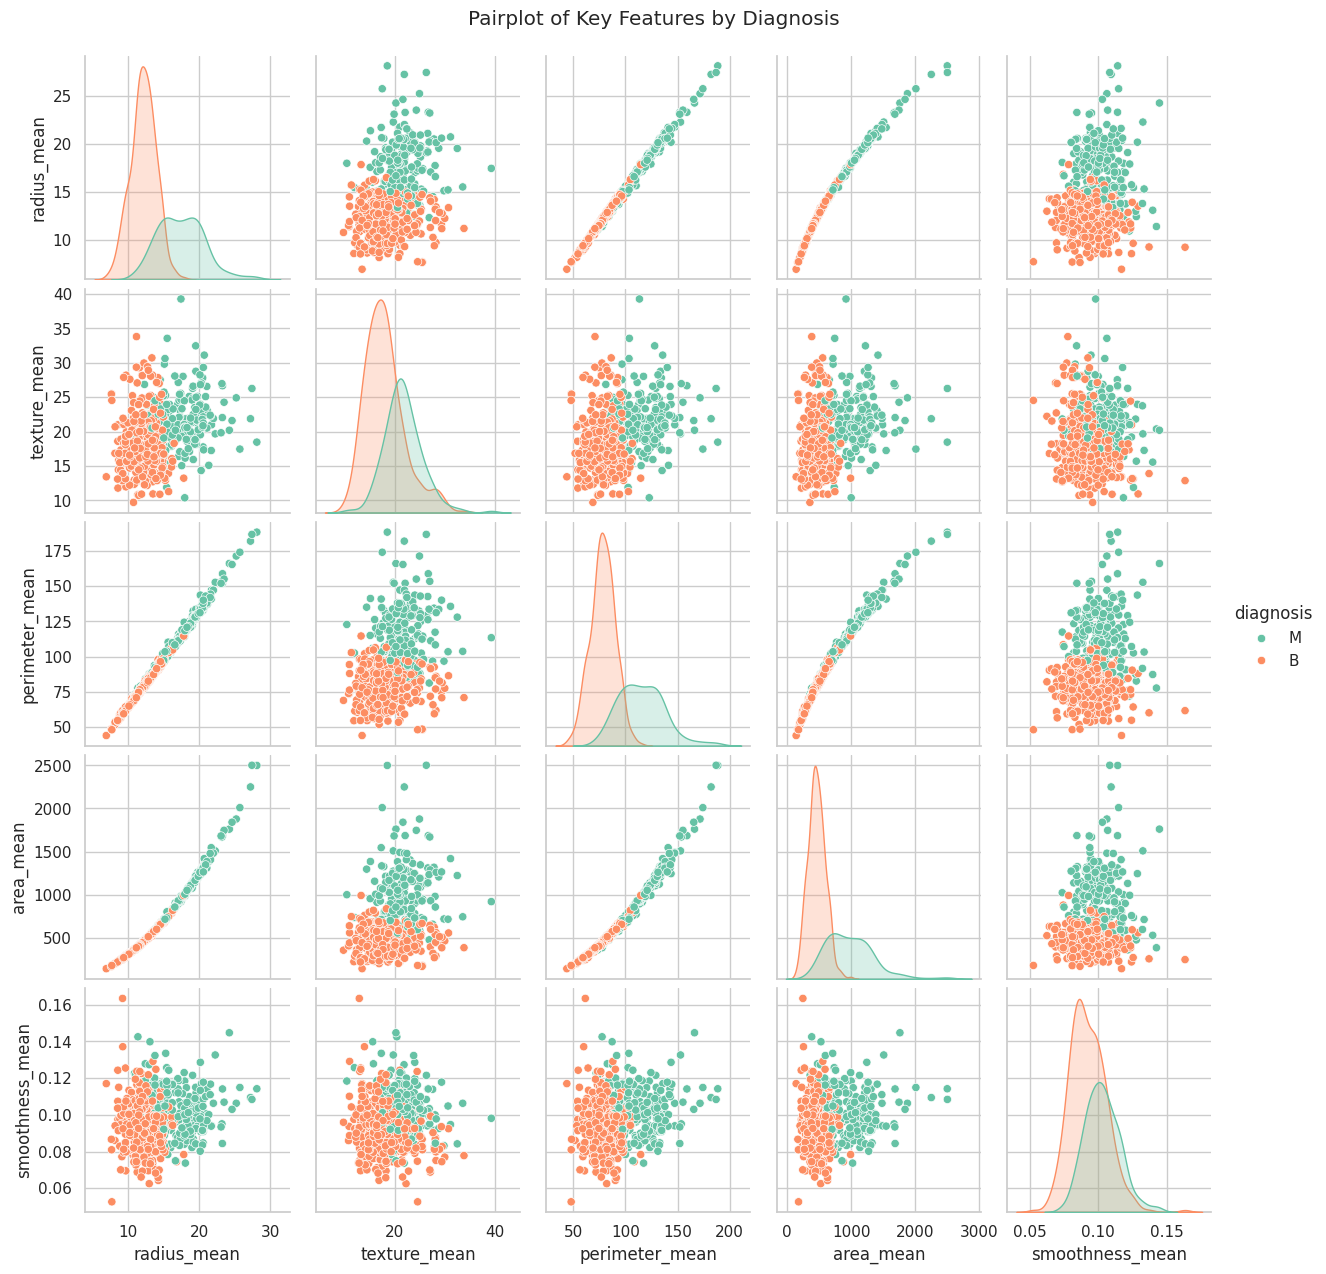

In [40]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']

sns.pairplot(df[selected_features], hue='diagnosis', palette='Set2', height=2.5)
plt.suptitle('Pairplot of Key Features by Diagnosis', y=1.02)
plt.show()

## Missing Values Visualization

In [41]:
# Create a heatmap of missing values
z_data = df.isna().astype(int)

if z_data.values.sum() > 0:  # Only create the plot if there are missing values
    fig = go.Figure(data=go.Heatmap(
        z=z_data.values,
        x=z_data.columns,
        y=z_data.index,
        colorscale='Viridis',
        showscale=True,
        colorbar=dict(title='Missing')
    ))
    
    fig.update_layout(
        title='Missing Values Heatmap',
        xaxis_title='Columns',
        yaxis_title='Index',
        plot_bgcolor='white',
        paper_bgcolor='white',
        font=dict(color='black'),
        width=700,
        height=600
    )
    
    fig.show()
else:
    print("No missing values to visualize.")

## Reports

In [42]:
z_data = df.isna().astype(int)
fig = go.Figure(data=go.Heatmap(
    z=z_data.values,
    x=z_data.columns,
    y=z_data.index,
    colorscale='Viridis',
    showscale=True,
    colorbar=dict(title='Missing')
))

fig.update_layout(
    title='Missing Values Heatmap',
    xaxis_title='Columns',
    yaxis_title='Index',
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    width=700,
    height=600
)

# Save figure to ../reports
fig.write_html("../reports/missing_values_heatmap.html")

# Optional: display in notebook
pio.renderers.default = 'iframe_connected'
fig.show()

## Summary and Next Steps

Based on our exploratory data analysis, we've gained several insights:

- The dataset contains features related to cell nucleus characteristics derived from breast mass images.
- We identified the presence of any missing values and duplicates.
- We analyzed the class distribution of malignant vs. benign cases.
- We examined correlations between features and identified relationships.
- We visualized feature distributions and their differences across diagnosis classes.

Next steps:
- Clean the data by handling missing values and duplicates
- Perform feature engineering
- Prepare the data for modeling
- Build and evaluate predictive models

In [43]:
# Save the progress
print("Data exploration completed!")

Data exploration completed!
